In [128]:
import numpy as np
from matplotlib import pyplot as plt
import scipy
%matplotlib inline

In [129]:
c2, A, B, C = (0.60, 1, 3, 3)

params = {'x0': 0,
          'y0': np.array([1, 1, A, 1]),
          'xn': 5,
          'n': 400}

def exact_ans(x):
    return np.array([np.exp(np.sin(x**2)),
                     np.exp(B * np.sin(x**2)),
                     C * np.sin(x**2) + A,
                     np.cos(x**2)])

In [130]:
def my_pow(x, B):
    if B == 3:
        return np.cbrt(x)
    else: 
        return np.power(x, 1/B)

In [131]:
def f(x, y):
    return np.array([2 * x * my_pow(y[1],B) * y[3],
                     2 * B * x * np.exp(B / C * (y[2] - A)) * y[3],
                     2 * C * x * y[3],
                     -2 * x * np.log(y[0])
                     ])

In [267]:
def ode(method, f, x0, y0, xn, h=None, n=None):
    if h == None:
        h = (xn - x0) / n
    else:
        n = int((xn - x0) // h)

    x, y = [x0], [y0]
    
    for i in range(n):
        x_new = x[-1] + h
        x.append(x_new)

        y_new = method(f, x[-1], y[-1], h)
        y.append(y_new)
    return np.array(x), np.array(y)

In [144]:
def RK_two_stage_step(f, x0, y0, h):
    a21 = c2
    b2 = 1 / 2 / c2
    b1 = 1 - b2
    k1 = f(x0, y0)
    k2 = f(x0 + c2 * h, y0 + h * a21 * k1)

    return y0 + h * (b1 * k1 + b2 * k2)

In [183]:
def average_point_step(f, x0, y0, h):
    return y0 + h * f(x0 + h/2, y0 + h/2 * f(x0, y0))

In [145]:
def first_RK_four_step(f, x0, y0, h):

    k1 = f(x0, y0)
    k2 = f(x0 + 1/2 * h, y0 + 1/2 * h * k1)
        
    k3 = f(x0 + 1/2 * h, y0 + 1/2 * h * k2)
        
    k4 = f(x0 + h, y0 + h * k3)

    return y0 + h * (1/6 * k1 + 1/3 * k2 + 1/3 * k3 + 1/6 * k4)

### Задание 1

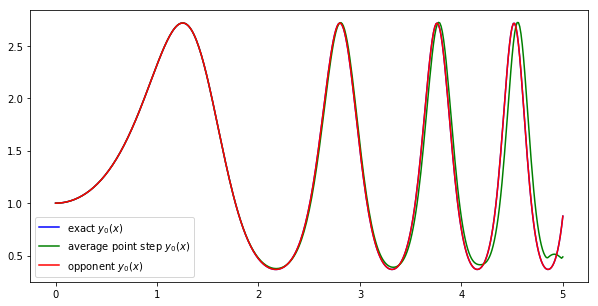

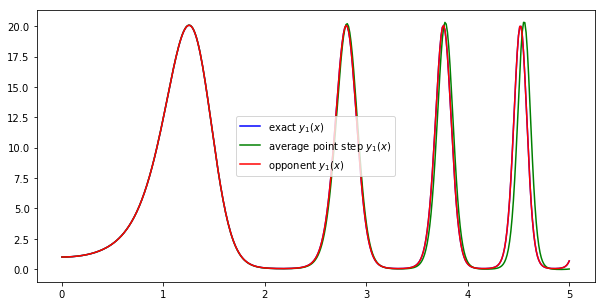

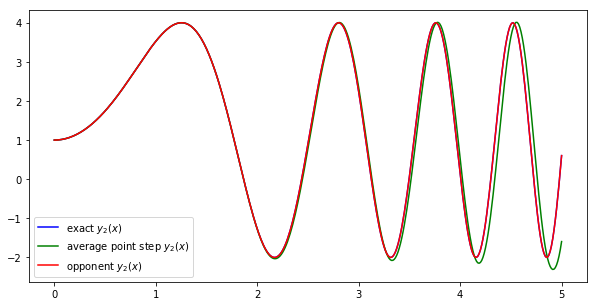

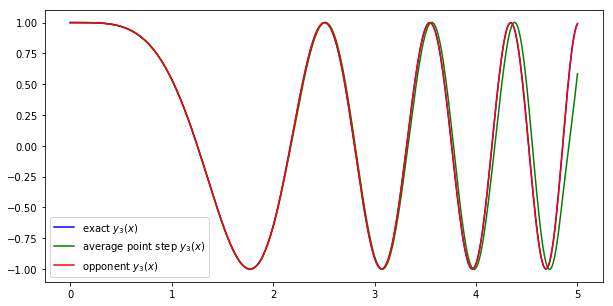

In [185]:
RK_X, RK_Y = ode(average_point_step, f, **params)
opponent_X, opponent_Y = ode(first_RK_four_step, f, **params)

for i in range(4):
    plt.figure(figsize=(10, 5))
    plt.plot(RK_X, exact_ans(RK_X)[i], 'b', label=f'exact $y_{i}(x)$')
    plt.plot(RK_X, RK_Y[:,i], 'g', label=f'average point step $y_{i}(x)$')
    plt.plot(opponent_X, opponent_Y[:,i], 'r', label=f'opponent $y_{i}(x)$')
    plt.legend()
    plt.show()

### Задание 2

In [218]:
def plot_norms(method):
    norms = []
    bound = range(2, 13)
    for k in bound:
        x0, y0, xn = params['x0'], params['y0'], params['xn']

        method_x, method_y = ode(method, f, x0, y0, xn, h=None, n=(xn - x0)*(2**k))
        err = np.linalg.norm(exact_ans(method_x[-1]) - method_y[-1])
        norms.append(-np.log2(err))
        print(f"n: {2**k} norm: {norms[-1]} err: {err}")
    plt.figure(figsize=(10, 5))
    plt.plot(bound, norms)
    plt.show()

n: 4 norm: -11.937476844479235 err: 3922.2800839193665
n: 8 norm: -11.45020413252176 err: 2798.0463242613628
n: 16 norm: -10.892328814698185 err: 1900.718036365976
n: 32 norm: -8.94598607432253 err: 493.1853292222124
n: 64 norm: -1.9573150332623905 err: 3.883385779773296
n: 128 norm: 0.5790910089236391 err: 0.6693854006000144
n: 256 norm: 2.744442080344012 err: 0.14922466494949788
n: 512 norm: 4.831685113934265 err: 0.03511703586146868
n: 1024 norm: 6.878484801777123 err: 0.008499037587670436
n: 2048 norm: 8.902796858296679 err: 0.0020892533170138654
n: 4096 norm: 10.915190453457694 err: 0.0005178455697295285


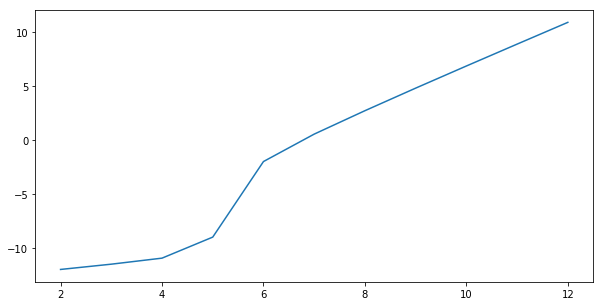

n: 4 norm: -9.546111254733555 err: 747.5940386230293
n: 8 norm: -0.9469135782463377 err: 1.927744134375458
n: 16 norm: 1.993975867674066 err: 0.251046085086173
n: 32 norm: 5.7877742093688225 err: 0.018101157817445063
n: 64 norm: 11.207438297005986 err: 0.0004228875485764573
n: 128 norm: 19.044404193682755 err: 1.8495372740495058e-06
n: 256 norm: 19.888301742085023 err: 1.0304445172757892e-06
n: 512 norm: 23.342287811629582 err: 9.403103172234116e-08
n: 1024 norm: 27.128685650410066 err: 6.814780566796674e-09
n: 2048 norm: 31.053537852810603 err: 4.4869748453176503e-10
n: 4096 norm: 35.65801594471849 err: 1.8444530920779903e-11


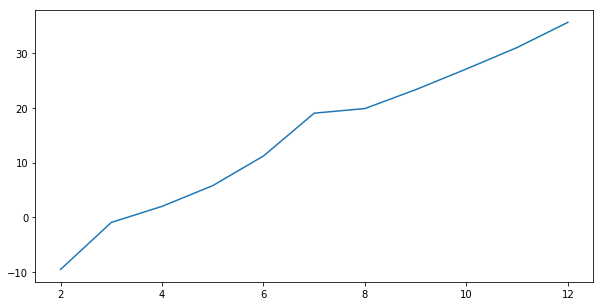

In [219]:
plot_norms(average_point_step)
plot_norms(first_RK_four_step)

### Задание 3

In [200]:
def get_h_opt(h, y_n, y_2n, tol=1e-5, p=2):
    r_n = (y_2n - y_n) / (1 - 2 ** (-p))
    r_2n = (y_2n - y_n) / (2 ** p - 1)
    return h * np.power(tol / np.linalg.norm(r_n), 1 / p)

In [238]:
def ode_h_opt(method, f, x0, y0, xn, p, n=None, tol=1e-5, h_init=1/(2**6)):
    _, yh = ode(method, f, x0, y0, xn, h=h_init)
    _, yh2 = ode(method, f, x0, y0, xn, h=h_init / 2)
    h_opt = get_h_opt(h, yh[-1], yh2[-1], tol, p)
    
    n = int((xn - x0) // h_opt)
    print(h_opt, n)
    
    x, y = [x0], [y0]
    
    for i in range(n):
        x_new = x[i] + h_opt
        x.append(x_new)

        y_new = method(f, x[i], y[i], h_opt)
        y.append(y_new)
        
    return np.array(x), np.array(y), h_opt

In [259]:
h_init = 1/(2**7)
x_opt, y_opt, h_opt = ode_h_opt(first_RK_four_step, f, p=2, tol=1e-6, h_init=h_init, **params)
f"h_init: {h_init}", f"h_opt: {h_opt}"

0.010554336045451517 473


('h_init: 0.0078125', 'h_opt: 0.010554336045451517')

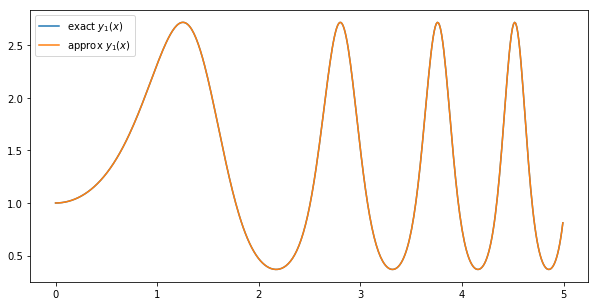

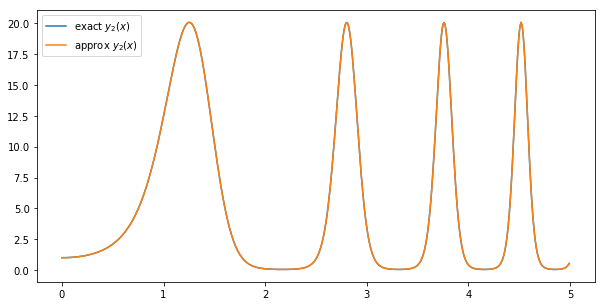

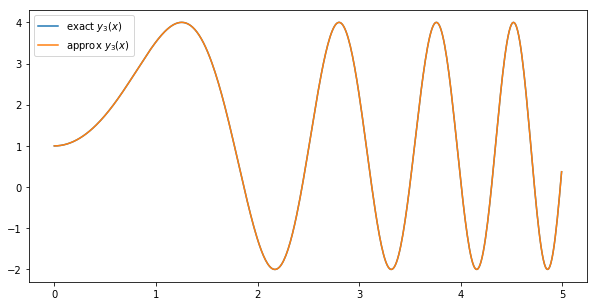

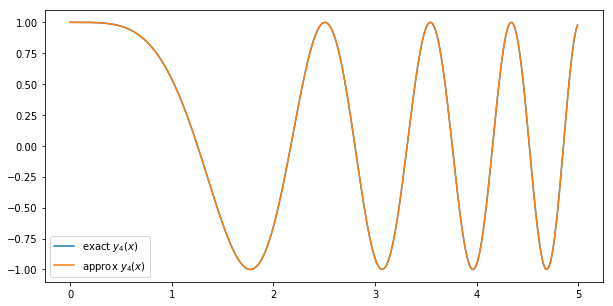

In [260]:
for i in range(4):
    plt.figure(figsize=(10, 5))
    plt.plot(x_opt, exact_ans(x_opt)[i], label='exact $y_{%s}(x)$' % (i+1))
    plt.plot(x_opt, y_opt[:,i], label='approx $y_{%s}(x)$' % (i+1))
    plt.legend()
    plt.show()

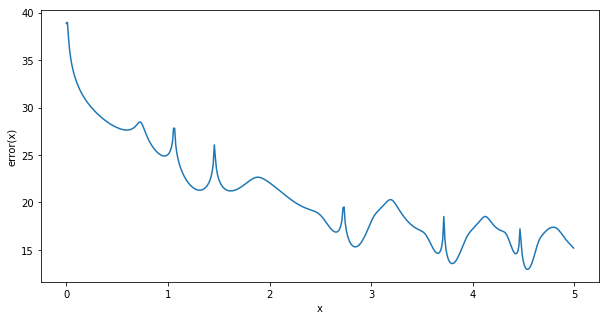

In [265]:
err = exact_ans(x_opt).T - y_opt + 1e-12 # + 1e-12 -> we don't have any zeroes in err
err = -np.log2(np.sum(err**2, axis=1)**0.5)

plt.figure(figsize=(10, 5))
plt.plot(x_opt, err)
plt.xlabel('x')
plt.ylabel('error(x)')
plt.show()

### Задание 4

In [266]:
def get_first_step(p, tol, f, x0, y0, x_end):
    delta1 = np.power(1 / max(np.abs(x0), np.abs(x_end)), p + 1) + np.linalg.norm(f(x0, y0)) ** (p + 1)
    
    h1 = np.power(tol / delta1, 1 / (p + 1))
    u1 = average_point_step(f, x0, y0, h1)

    delta2 = np.power(1 / max(np.abs(x0 + h1), np.abs(x_end)), p + 1) + np.linalg.norm(f(x0 + h1, y0 + u1)) ** (p + 1)

    h2 = np.power(tol / delta2, 1 / (p + 1))

    return min(h1, h2)

In [277]:
def ode_optimal(method, f, x0, y0, xn, n, p, rtol, atol):
    tol = rtol * np.linalg.norm(y0) + atol
    h = get_first_step(p, tol, f, x0, y0, xn)

    x, y = [x0], [y0]

    y_old = method(f, x0, y0, h)
    y_mid = method(f, x0, y0, h / 2)
    y_new = method(f, x0 + h/2, y_mid, h/2)

    err_old = (y_new - y_old) / (1 - 2 ** (-p))
    err_new = (y_new - y_old) / ((2 ** p) - 1)

    h_cur = h
    h_next = h
    h_max = h_cur

    while x[-1] < xn:
        if np.linalg.norm(err_old) > tol * 2**p:
            h_cur /= 2

            y_old = y_mid
            y_mid = method(f, x[-1], y[-1], h_cur / 2)
            y_new = method(f, x[-1] + h_cur / 2, y_mid, h_cur / 2)

            err_old = (y_new - y_old) / (1 - 2 ** (-p))
            err_new = (y_new - y_old) / ((2 ** p) - 1)
            
            continue

        elif tol < np.linalg.norm(err_old) <= tol * 2**p:
            h_next = h_cur / 2

            x.append(x[-1] + h_cur)
            y.append(y_new + err_new)

            h_max = max(h_max, h_cur)

        elif tol * (2 ** (-p - 1)) <= np.linalg.norm(err_old) <= tol:
                h_next = h_cur

                x.append(x[-1] + h_cur)
                y.append(y_old + err_old)

                h_max = max(h_max, h_cur)

        elif np.linalg.norm(err_old) < tol * (2 ** (-p - 1)):
                h_next = min(2 * h_cur, h_max)

                x.append(x[-1] + h_cur)
                y.append(y_old + err_old)

                h_max = max(h_max, h_cur)

        h_cur = h_next

        y_old = method(f, x[-1], y[-1], h_cur)
        y_mid = method(f, x[-1], y[-1], h_cur / 2)
        y_new = method(f, x[-1] + h_cur / 2, y_mid, h_cur / 2)

        err_old = (y_new - y_old) / (1 - 2 ** (-p))
        err_new = (y_new - y_old) / ((2 ** p) - 1)
        tol = rtol * np.linalg.norm(y[-1]) + atol

    return np.array(x), np.array(y)

In [280]:
def plot_norms_optimal(method, rtol, atol, p):
    x_opt, y_opt = ode_optimal(method, f, p=p, rtol=rtol, atol=atol,  **params)

    for i in range(4):
        plt.figure(figsize=(10, 5))
        plt.plot(x_opt, exact_ans(x_opt)[i], label=f'exact $y_{i}(x)$')
        plt.plot(x_opt, y_opt[:,i], label=f'approx $y_{i}(x)$')
        plt.legend()
        plt.show()


    err = exact_ans(x_opt).T - y_opt + 1e-12 # + 1e-12 -> we don't have any zeroes in err
    err = -np.log2(np.sum(err**2, axis=1)**0.5)

    plt.figure(figsize=(10, 5))
    plt.plot(x_opt, err)
    plt.xlabel('x')
    plt.ylabel('error(x)')
    plt.show()


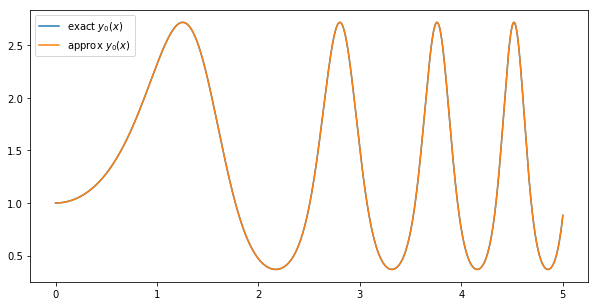

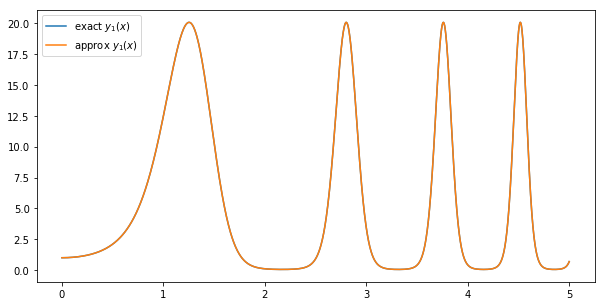

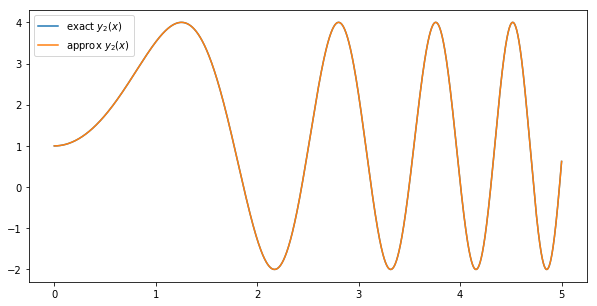

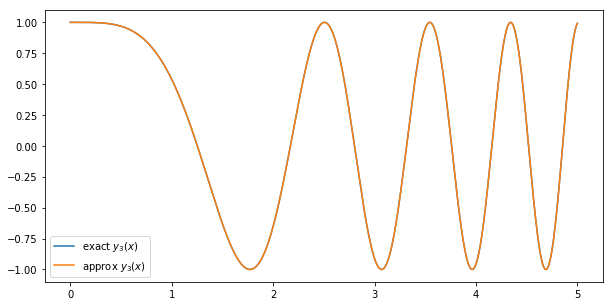

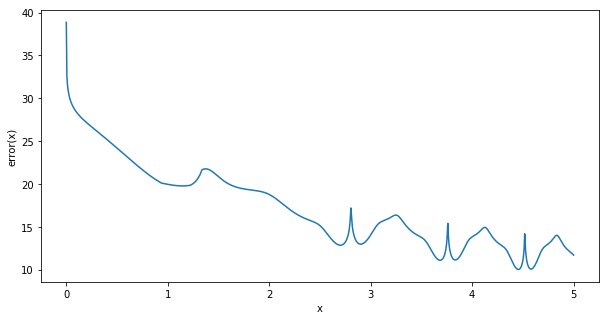

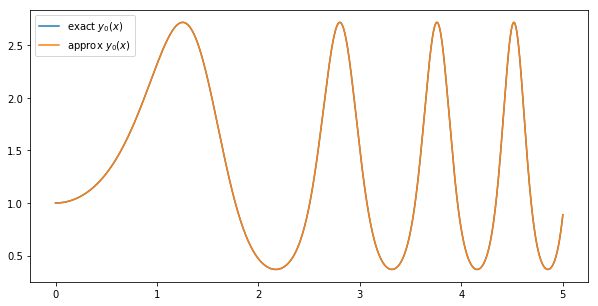

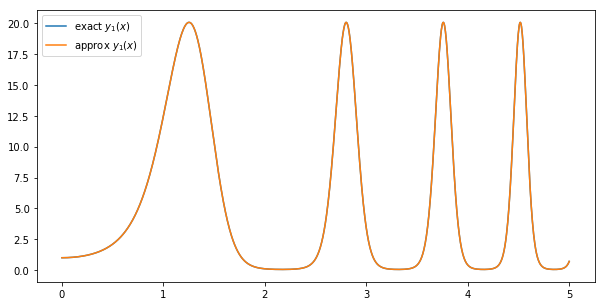

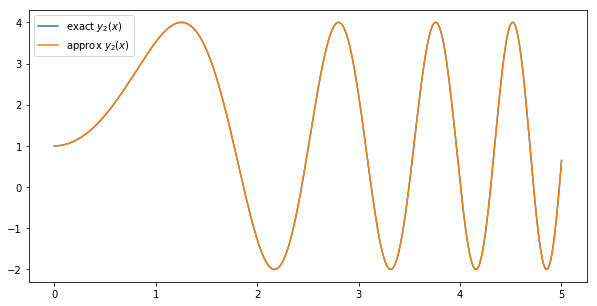

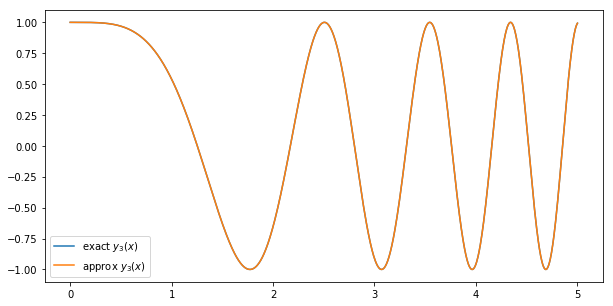

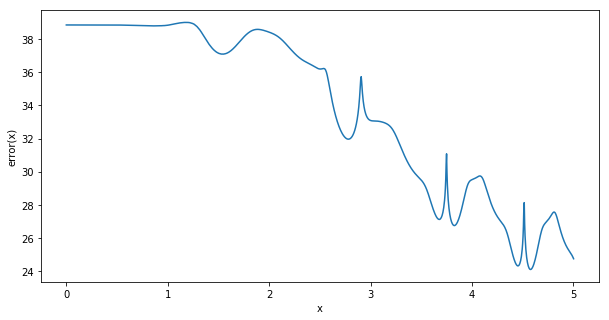

In [281]:
plot_norms_optimal(RK_two_stage_step, 1e-6, 1e-12, 2)
plot_norms_optimal(first_RK_four_step, 1e-6, 1e-12, 4)